In [1]:
from pathlib import Path
from ec4py import *
from ec4py import Quantity_Value_Unit as QV
from ec4py.util_voltammetry import Voltammetry,find_vertex,split_rawData_into_sweeps,assemble_as_CV
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy import integrate
from scipy.signal import savgol_filter 


In [2]:
def find_vertexDEV(E:np.array):
    #array of dx
    x_div = np.gradient(savgol_filter(E, 10, 1))
    
    ##find vertext
    zero_crossings = np.where(np.diff(np.signbit(x_div)))[0]
    print("ZERO:",zero_crossings)
    vertex = zero_crossings  
    ## add last index as a vertex
    vertex = np.append(vertex,len(E)-1)
    print("ZERO:",vertex)
    positive_start = E[0]<E[vertex[0]]
    
    
    ## Number of vertext
    Two_vertex = len(vertex)>1
   
    # print("size",len(zero_crossings),zero_crossings,len(zero_crossings)<2)
    ### Manualy find the first Vertex.
    if len(vertex)>1:
        if positive_start:
            vertex[0] = np.argmax(E[0:vertex[1]])
        else:
            vertex[0] = np.argmin(E[0:vertex[1]])
    #print(f"ZeroCrossings: {zero_crossings}")
    #print(zero_crossings)
    # make E axis.
    return vertex


In [3]:
Eup = np.array([(x-100)/100 for x in range(0,201)])

print(Eup, len(Eup))
print(find_vertexDEV(Eup))


[-1.   -0.99 -0.98 -0.97 -0.96 -0.95 -0.94 -0.93 -0.92 -0.91 -0.9  -0.89
 -0.88 -0.87 -0.86 -0.85 -0.84 -0.83 -0.82 -0.81 -0.8  -0.79 -0.78 -0.77
 -0.76 -0.75 -0.74 -0.73 -0.72 -0.71 -0.7  -0.69 -0.68 -0.67 -0.66 -0.65
 -0.64 -0.63 -0.62 -0.61 -0.6  -0.59 -0.58 -0.57 -0.56 -0.55 -0.54 -0.53
 -0.52 -0.51 -0.5  -0.49 -0.48 -0.47 -0.46 -0.45 -0.44 -0.43 -0.42 -0.41
 -0.4  -0.39 -0.38 -0.37 -0.36 -0.35 -0.34 -0.33 -0.32 -0.31 -0.3  -0.29
 -0.28 -0.27 -0.26 -0.25 -0.24 -0.23 -0.22 -0.21 -0.2  -0.19 -0.18 -0.17
 -0.16 -0.15 -0.14 -0.13 -0.12 -0.11 -0.1  -0.09 -0.08 -0.07 -0.06 -0.05
 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07
  0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19
  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31
  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43
  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55
  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0

In [4]:
print(find_vertex(Eup))
Edn = np.flipud(Eup)
print(find_vertex(Eup))
E1 = np.append(Eup,Edn[1:])
print(find_vertex(E1))
E2 = np.append(Edn,Eup[1:])
Eup_short = np.array([(x)/100 for x in range(0,201)])

E3 = np.append(Eup[50:],Edn[1:])
E3 = np.append(E3,Eup[1:50])

print(find_vertex(E3))


[200]
[200]
[200 400]
[150 349 399]


In [6]:
Volt= Voltammetry()
vertex = find_vertex(Eup)
print(vertex)
Volt= Voltammetry()
print(split_rawData_into_sweeps(Volt , Eup,Eup))
print(split_rawData_into_sweeps(Volt ,Edn,Edn))
print(split_rawData_into_sweeps(Volt ,E1,E1))
print(split_rawData_into_sweeps(Volt ,E2,E2))
print(split_rawData_into_sweeps(Volt ,E3,E3))


[200]
[(array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'pos')]
[(array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'neg')]
[(array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'pos'), (array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'neg')]
[(array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'neg'), (array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'pos')]
[(array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'pos'), (array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'neg'), (array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'pos')]


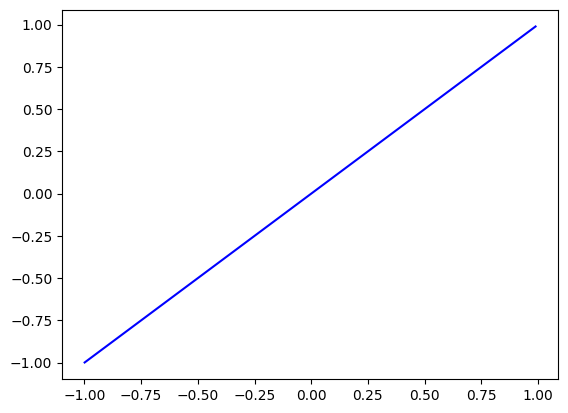

In [7]:
data= Voltammetry()
a,b = assemble_as_CV(Eup,Eup)
plt.plot(data.E,a,"b",data.E,b,"or")

In [15]:
try :
    ba=float("s33")
except ValueError:
    print("A")
print(ba)



A


NameError: name 'ba' is not defined

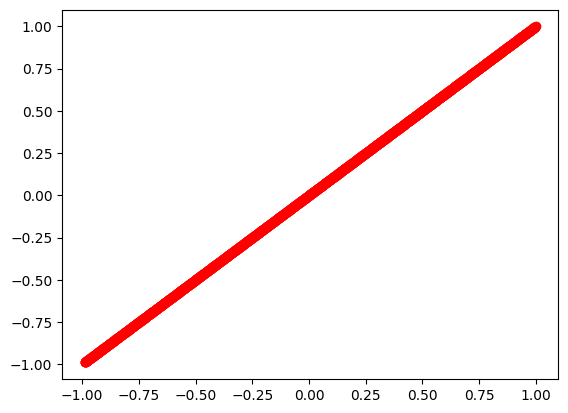

In [ ]:
a,b = assemble_as_CV(Edn,Edn)
plt.plot(data.E,a,"b",data.E,b,"or")

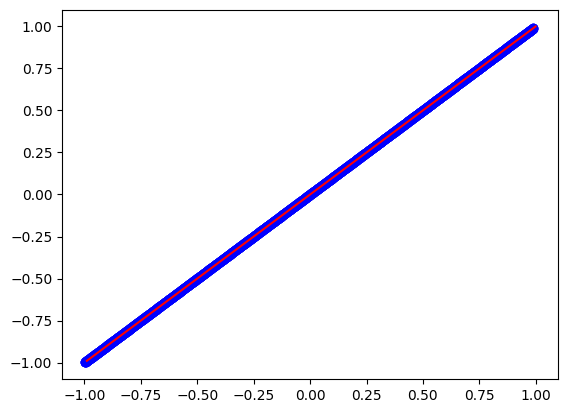

In [ ]:
a,b = assemble_as_CV(E1,E1)
plt.plot(data.E,a,"bo",data.E,b,"r")



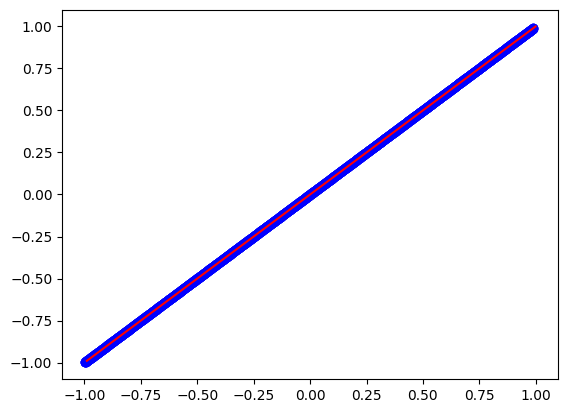

In [ ]:

a,b = assemble_as_CV(E2,E2)
plt.plot(data.E,a,"bo",data.E,b,"r")


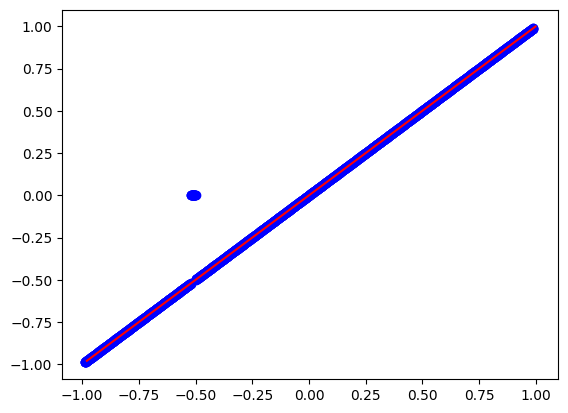

In [ ]:

a,b = assemble_as_CV(E3,E3)
plt.plot(data.E,a,"bo",data.E,b,"r")

In [ ]:
def split_rawData_into_sweepsDEV(x,y,vertex= None):
            #print("ZERO:",len(zero_crossings),zero_crossings, "2x vertex", Two_vertex)
       
        if vertex is None:
            vertex = find_vertex(x)
        positive_start = x[0]<x[vertex[0]]
        sweep_i = []
        if len(vertex)>0:
            sweep_i.append( Voltammetry()._from_xy_split_into_a_sweep(x[0:vertex[0]],y[0:vertex[0]]))
        if len(vertex)>1: # if index is 1 or more.
            rng = range(vertex[0],vertex[1])
            sweep_i.append( Voltammetry()._from_xy_split_into_a_sweep(x[vertex[0]:vertex[1]],y[vertex[0]:vertex[1]]))
        if len(vertex)>2:
            x2 = x[vertex[1]:vertex[2]]
            y2 = y[vertex[1]:vertex[2]] 
            if positive_start:
                mask = x2<x[0:vertex[0]].min()
            else:
                mask = x2>x[0:vertex[0]].max()
            x2b=np.array(x2[mask])
            y2b=np.array(y2[mask])
            sweep_i.append( Voltammetry()._from_xy_split_into_a_sweep(x2b,x2b))
        return sweep_i


In [ ]:
vertex = find_vertex(Eup)
print(vertex)
print(split_rawData_into_sweepsDEV(Eup,Eup,vertex))


[200]
[(array([0., 0., 0., ..., 0., 0., 0.], shape=(5001,)), 'pos')]
